### Load logs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

logs_map = {
    "training_loss": 'arr_0',
    "training_accuracy": 'arr_1',
    "validation_loss": 'arr_2',
    "validation_accuracy": 'arr_3',
    "test_loss": 'arr_4',
    "test_accuracy": 'arr_5'
}
# All model versions done. All models are relative to the base model
# e.g. Drop1< means Dropout For Layer 1 of the current mode is less than
# the Dropout of the base model for the same layer
name_map =  {
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=50.": 
    "Base Model - 512:256:128 - LeakyReLU - Adam - LR=0.005 - Drop=0.25:0.3:0.35",

    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.3:0.35_batch=50000_epochs=100.": 
    "Base (100ep)",

    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.3:0.4_batch=50000_epochs=50.": 
    "Drop1< + Drop3> + LR*2",
    
    "NN_1024_512_256_LeakyReLU_Adam_LR=0.0005_Dropout=0.2_0.35_0.45_L2=0.0001_batch=50000_epochs=50.":
    "LayerSizes*2 + Drop1< + Drop2&3> + L2 + LR*2",
    
    "NN_1024_512_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45-0.5_L2=0.0001_batch=50000_epochs=50.":
    "4 Layers + Lay1*2 + AllDrop>",

    "NN_2048_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45_L2=0.0001_batch=50000_epochs=50.":
    "LayerSize1*4",

    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3_batch=20000_epochs=50.": 
    "AllDrop< + LayerSizes/2 + LR*2",
    
    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.3:0.3:0.4_batch=30000_epochs=50.": 
    "LayerSizes/2 + Drop1&3> + (30k batch) + LR*2",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.25:0.35:0.4_L2=0.0001_batch=50000_epochs=50.": 
    "Drop2&3> + L2",
    
    "NN_256:128:64_LeakyReLU_Adam_LR=0.001_Dropout=0.2:0.2:0.3.": 
    "LayerSize/2 + LR*2 + AllDrop<",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L2=0.0001_batch=50000_epochs=50_LRDecay.": 
    "Best Model (LR Decay)",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L2=0.001_batch=30000_epochs=50.": 
    "L2 Only",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L1=2e-05_L2=0_batch=30000_epochs=50.": 
    "L1 Only",
    
    "NN_512:256:128_LeakyReLU_Adam_LR=0.001_Dropout=0:0:0_L1=2e-05_L2=0.0001_batch=30000_epochs=50.": 
    "L1 & L2",

    "NN_512:256:128_LeakyReLU_None_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "Vanilla GD",

    "NN_512:256:128_LeakyReLU_RMS_Prop_LR=0.0005_Dropout=0.25:0.3:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "RMS Prop",
    
    "NN_256:128_LeakyReLU_Adam_LR=0.0005_Dropout=0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "2 Layer Network",

    "NN_512:256:128_64_LeakyReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_0.5_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "4 Layer Network",

    "NN_512:256:128_Sigmoid_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "Sigmoid",
    
    "NN_512:256:128_ReLU_Adam_LR=0.0005_Dropout=0.2:0.35:0.45_L1=0_L2=0.0001_batch=50000_epochs=50.": 
    "ReLU",   
}
log_files = glob.glob("../nn-logs/*.npz")
experiments = {}
for file in log_files:
    filename = file.split("/")[-1].replace("npz", "")
    clean_name = name_map.get(filename, filename)
    experiments[clean_name] = np.load(file)
    if filename not in name_map:
        print(filename)


NN_1024_512_256_128_LeakyReLU_Adam_LR=0.0005_Dropout=0.2-0.35-0.45-0.5_L2=0.0001_batch=50000_epochs=50.


## Add More Graphs - The comparisons between (ActivationFuncs, Regularisers, Optimisers, HiddenLayerSizes) are done

## Make the graphs look much better and cleaner so we can present them in the report

In [ ]:
# This is an example of how to do the graphs, loop through in this way
# and use logs_map["nameoflogmetric"] to access what metric you need
# Use a markdown cell above the specific thing you are doing

plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14,8))

for name, logs in experiments.items():
    train_loss = logs[logs_map["training_loss"]]
    plt.plot(train_loss, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

#### Comparing Activation Functions (Sigmoid vs ReLU vs LeakyReLU)

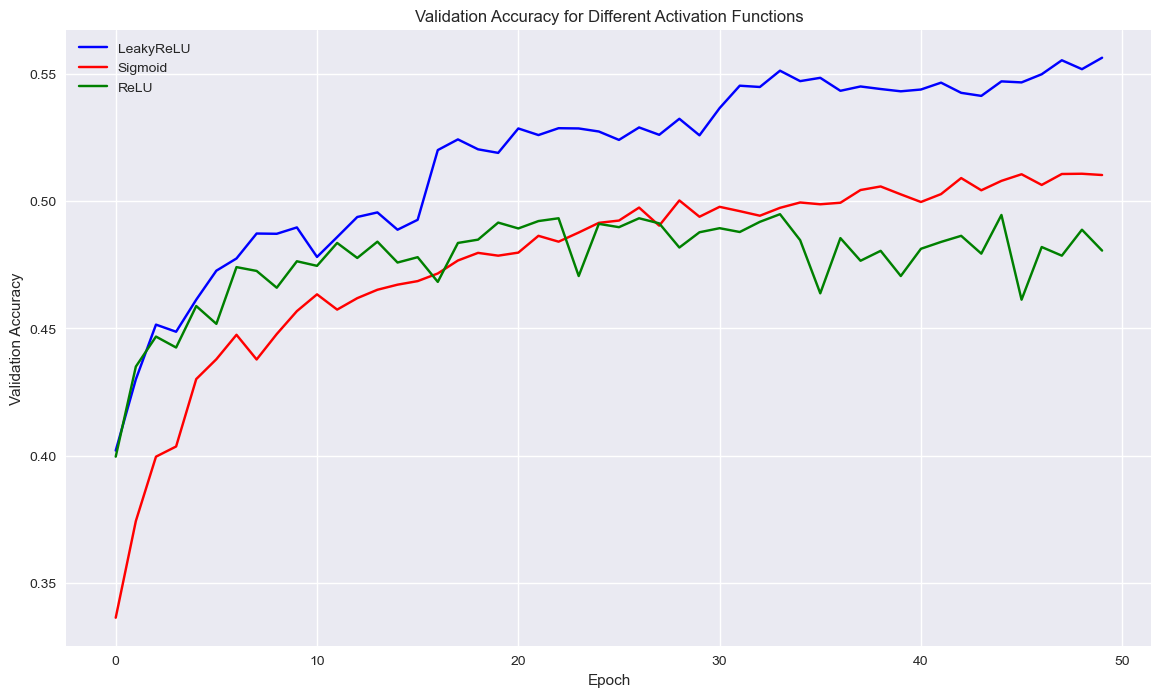

In [5]:
activation_func_comp_models = ["Best Model (LR Decay)", "Sigmoid", "ReLU"]
colours = ["Blue", "Red", "Green"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(activation_func_comp_models):
    logs = experiments[name]
    validation_accuracy = logs[logs_map["validation_accuracy"]]
    if name == "Best Model (LR Decay)":
        name = "LeakyReLU"
    plt.plot(validation_accuracy, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy for Different Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

#### Comparison of different optimisers (Vanilla Gradient Descent, RMS Prop, Adam)

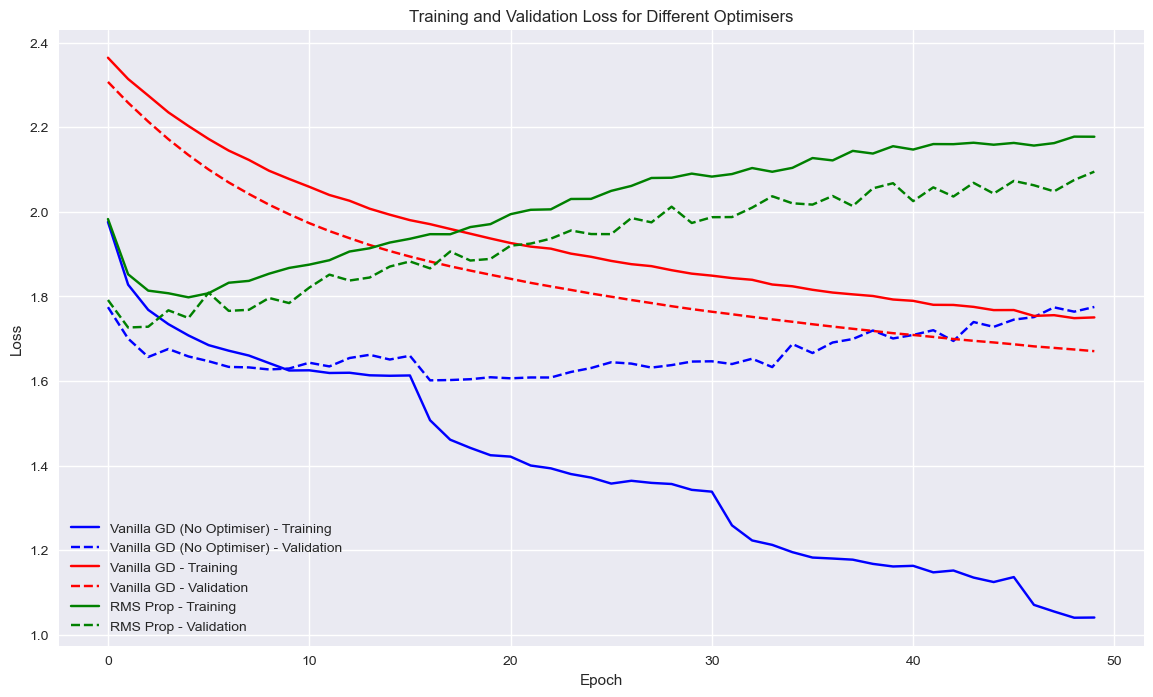

In [6]:
optimiser_comp_models = ["Best Model (LR Decay)", "Vanilla GD", "RMS Prop"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(optimiser_comp_models):
    logs = experiments[name]
    training_loss = logs[logs_map["training_loss"]]
    validation_loss = logs[logs_map["validation_loss"]]
    if name == "Best Model (LR Decay)":
        name = "Vanilla GD (No Optimiser)"
    plt.plot(training_loss, label=f"{name} - Training", color=colours[c])
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Different Optimisers")
plt.legend()
plt.grid(True)
plt.show()

#### Comparison of Regularisers (L1, L2, Dropout)

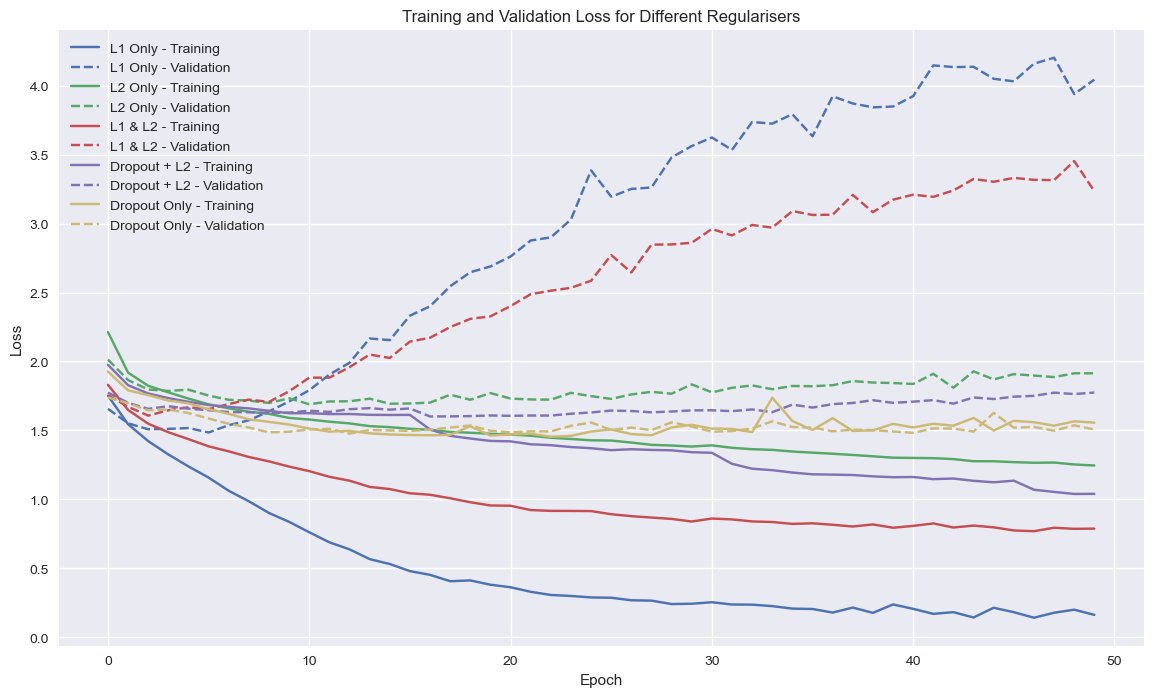

In [7]:
# Training Loss and Validation Loss
regularisers_models = ["L1 Only", "L2 Only", "L1 & L2", "Best Model (LR Decay)", "Drop1< + Drop3> + LR*2"]
plt.figure(figsize=(14, 8))
for name in regularisers_models:
    logs = experiments[name]
    training_loss = logs[logs_map["training_loss"]]
    validation_loss = logs[logs_map["validation_loss"]]
    if name == "Best Model (LR Decay)":
        name = "Dropout + L2"
    elif name == "Drop1< + Drop3> + LR*2":
        name = "Dropout Only"
    line = plt.plot(training_loss, label=f"{name} - Training")
    line = line[0]
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=line.get_color())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Different Regularisers")
plt.legend()
plt.grid(True)
plt.show()

#### Comparing Network Architecture - Shallow Network or Deeper Network?

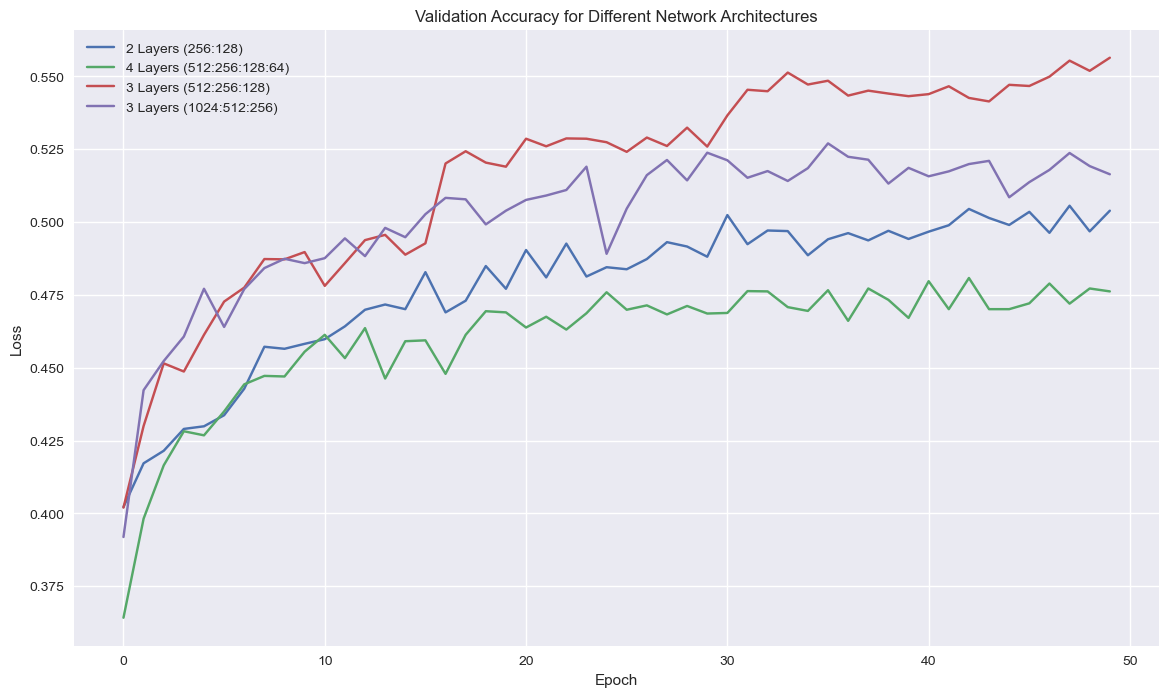

In [8]:
networkarch_comparison_models = {
    "2 Layer Network": "2 Layers (256:128)",
    "4 Layer Network": "4 Layers (512:256:128:64)",
    "Best Model (LR Decay)": "3 Layers (512:256:128)", 
    "LayerSizes*2 + Drop1< + Drop2&3> + L2 + LR*2": "3 Layers (1024:512:256)",
}
plt.figure(figsize=(14, 8))
for name in networkarch_comparison_models:
    logs = experiments[name]
    validation_accuracy = logs[logs_map["validation_accuracy"]]
    plt.plot(validation_accuracy, label=networkarch_comparison_models[name])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Accuracy for Different Network Architectures")
plt.legend()
plt.grid(True)
plt.show()